Defining libraries and uploading the file

In [5]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd


In [3]:
import tensorflow as tf
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  13


In [5]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10881826625858539617,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2254123828
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12364998158283997208
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [17]:
#from google.colab import files
#uploaded = files.open('/content/drive/MyDrive/NN/TextBot/Harry Potter X 50 Shades of grey.txt')
#with open("/content/drive/MyDrive/NN/TextBot/Harry Potter And the Half-Blood Prince.txt", "r") as file:

lyrics_file = open('C:/Users/User/Desktop/auto_.txt', 'r').read()

#!cp "/content/drive/MyDrive/NN/TextBot/Harry Potter And the Half-Blood Prince.txt" "Harry Potter And the Half-Blood Prince.txt"

Formatting the data into a list of sentences

In [18]:
import string
#file_name = "generated text.txt"
#uploaded[file_name].decode("utf-8")
#uploaded[file_name].decode("utf-8").split("\r\n")
#print(open(file_name).read())
raw_sentences = lyrics_file
#raw_sentences = unicodetoascii(raw_sentences)
#raw_sentences = raw_sentences.replace('Lyrics','').replace('21Embed','')
#raw_sentences = raw_sentences.replace('\\','')
#aw_sentences = raw_sentences.replace('\\n', ' AnewLineStarts ')
sentences = raw_sentences.split('\n')
#sentences.replace('\r\n',' ')
#print(sentences)

Spliting the data into train and test sets


In [19]:
tokenizer = Tokenizer( 
    num_words=100,
    #split=" ",
    #filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n\r',
    #char_level=
    # False,
    )
training_size = 1000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size]
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
padding_type = "pre"
trunc_type = "post"    
input_sequences = []
for line in sentences:
    #print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
      n_gram_sequence = token_list[:i+1]
      input_sequences.append(n_gram_sequence)
#print(input_sequences)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len,
                                         padding = padding_type))
print(max_sequence_len)
#print(sentences)
#print(input_sequences)

14


In [20]:
#words = list(uploaded.items())
#sentences.replace('\r\n',' ')
#tokenizer.fit_on_texts(training_sentences)
#word_index = tokenizer.word_index

#training_sequences = tokenizer.texts_to_sequences(training_sentences)
#training_padded = pad_sequences(training_sequences, maxlen = max_sequence_len,
                                #padding = padding_type, truncating = trunc_type)
#testing_sequences= tokenizer.texts_to_sequences(testing_sentences)
#testing_padded = pad_sequences(testing_sequences, maxlen = max_sequence_len,
                            #   padding = padding_type, truncating = trunc_type)

total_words = len(tokenizer.word_index)+1
print(total_words)
#print(input_sequences)
#print(word_index)
#print(sequences)
#print(padded)

835


Splitting the input into x and label

In [21]:
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
#print(input_sequences)
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)
#print(xs)
print(len(labels))

3219


Neural Network

In [22]:
model = Sequential()
model.add(Embedding(total_words,256,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])
history = model.fit(xs,ys,epochs = 250, verbose=1)

Epoch 1/250
101/101 [==============================] - 4s 11ms/step - loss: 4.1096 - accuracy: 0.1280
Epoch 2/250
101/101 [==============================] - 1s 9ms/step - loss: 2.7857 - accuracy: 0.3327
Epoch 3/250
101/101 [==============================] - 1s 8ms/step - loss: 2.1433 - accuracy: 0.4554
Epoch 4/250
101/101 [==============================] - 1s 8ms/step - loss: 1.6953 - accuracy: 0.5561
Epoch 5/250
101/101 [==============================] - 1s 9ms/step - loss: 1.4060 - accuracy: 0.6139
Epoch 6/250
101/101 [==============================] - 1s 8ms/step - loss: 1.1957 - accuracy: 0.6636
Epoch 7/250
101/101 [==============================] - 1s 9ms/step - loss: 1.0513 - accuracy: 0.6984
Epoch 8/250
101/101 [==============================] - 1s 8ms/step - loss: 0.9625 - accuracy: 0.7130
Epoch 9/250
101/101 [==============================] - 1s 9ms/step - loss: 0.9164 - accuracy: 0.7260
Epoch 10/250
101/101 [==============================] - 1s 9ms/step - loss: 0.8769 - accur

Seeing what we have created

In [24]:
seed_text = "it all starts like this"
next_words = 90

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen = max_sequence_len-1,padding = "pre")
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
#seed_text = seed_text.replace("AnewLineStarts",'\\n')
print(seed_text)

it all starts like this all i want to do is this for something there for down not the end up in the end it even only with up in the end this not the end this is not the end this is not the end this is not the end this is not the end this is not the end this is not the end this is not the end this is not the end this is not the end this is not the end this is not the end this is not the


In [ ]:
model.save('/content/my_model_HP-HBP')

INFO:tensorflow:Assets written to: /content/my_model_HP-HBP\assets


INFO:tensorflow:Assets written to: /content/my_model_HP-HBP\assets


In [ ]:
#seed_text = seed_text.replace("AnewLineStarts",'\\n')
print(seed_text)
print(total_words)
seed_text = seed_text.replace('\n','> \n')

with open('/content/HP-HBP.txt', 'w') as writefile:
    writefile.write(seed_text)

 Harry in the just in the just in the just in the just with my is to me down and it all out to find a on the good all the only in my skin i feel the way i be the the one the one the one the one the on the on the to on way way goodbye is to me and it all out find a way the on the and the something was not all all in time yeah they i fall all the in me a
835


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.figure(figsize=(8, 6), dpi=80)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

ModuleNotFoundError: No module named 'matplotlib'

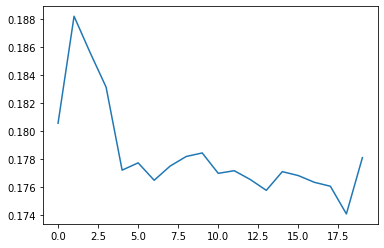

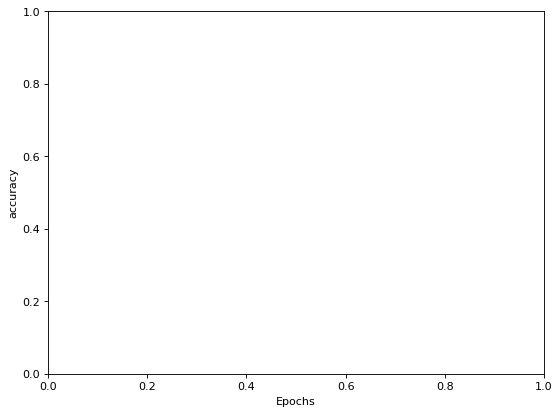

: 

In [ ]:
plot_graphs(history, 'accuracy')